# Data Analysis Notebook
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [31]:
#This notebook combines data collection (scraping) and data preprocessing.
# Put this at the top of eda.ipynb
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import importlib.util
import seaborn as sns
# 1) Locate project root and src
cwd = Path.cwd()
if cwd.name == "notebooks":
    project_root = cwd.parent
else:
    project_root = next((p for p in cwd.parents if (p / "src").exists()), cwd)
SRC_DIR = project_root / "src"
print("Project root:", project_root)
print("Adding src to sys.path:", SRC_DIR)
sys.path.insert(0, str(SRC_DIR))

# 2) Ensure preprocess.py exists
preprocess_file = SRC_DIR / "preprocess.py"
if not preprocess_file.exists():
    raise FileNotFoundError(f"Expected file not found: {preprocess_file}")

# 3) Import preprocess module (normal import, fallback to file loader)
module_name = "preprocess"
try:
    preprocess_mod = importlib.import_module(module_name)
    print(f"Imported module '{module_name}' normally.")
except Exception as e:
    print(f"Normal import failed ({e}). Loading from file.")
    spec = importlib.util.spec_from_file_location(module_name, str(preprocess_file))
    preprocess_mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(preprocess_mod)
    sys.modules[module_name] = preprocess_mod
    print(f"Loaded module '{module_name}' from {preprocess_file}")

# 4) Expose ReviewPreprocessor
if hasattr(preprocess_mod, "ReviewPreprocessor"):
    ReviewPreprocessor = preprocess_mod.ReviewPreprocessor
    print("ReviewPreprocessor is ready to use.")
else:
    raise ImportError(f"'ReviewPreprocessor' not found in {preprocess_file}. Check class name inside the file.")

# 5) Import scraper and expose run_scraper (accepts function named main or run_scraper)
scrap_file = SRC_DIR / "scrap.py"
if not scrap_file.exists():
    print(f"Warning: expected scraper file not found: {scrap_file}")
else:
    try:
        scrap_mod = importlib.import_module("scrap")
    except Exception:
        spec = importlib.util.spec_from_file_location("scrap", str(scrap_file))
        scrap_mod = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(scrap_mod)
        sys.modules["scrap"] = scrap_mod

    if hasattr(scrap_mod, "run_scraper") and callable(scrap_mod.run_scraper):
        run_scraper = scrap_mod.run_scraper
    elif hasattr(scrap_mod, "main") and callable(scrap_mod.main):
        run_scraper = scrap_mod.main
    else:
        run_scraper = None
        print("No callable 'run_scraper' or 'main' found in scrap.py. Define one to run the scraper.")
        
# run scraper (if available)
if 'run_scraper' in globals() and callable(run_scraper):
    raw_df = run_scraper()
    display(raw_df.head())
else:
    print("run_scraper is not available. Check src/scrap.py for a callable 'main' or 'run_scraper'.")
    
    
# instantiate and run preprocessor
preprocessor = ReviewPreprocessor()
success = preprocessor.process()
if success:
    df = preprocessor.df
    print("Preprocessing finished, rows:", len(df))
else:
    print("Preprocessing failed.")
    
    

Project root: c:\Users\Administrator\Desktop\fintech-customer-experience-analytics
Adding src to sys.path: c:\Users\Administrator\Desktop\fintech-customer-experience-analytics\src
Imported module 'preprocess' normally.
ReviewPreprocessor is ready to use.
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.319299
Total Ratings: 38863
Total Reviews: 8337

Awash: Awash Bank
App ID: com.sc.awashpay
Current Rating: 4.324944
Total Ratings: 17787
Total Reviews: 3273

Amharabank: Amharabank
App ID: com.amharabank.Aba_mobile_banking
Current Rating: 4.4607844
Total Ratings: 748
Total Reviews: 185

App information saved to C:\Users\Administrator\Desktop\fintech-customer-experience-analytics\data\raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:05<00:10,  5.42s/it]


Scraping reviews for com.sc.awashpay...
Successfully scraped 400 reviews
Collected 400 reviews for Awash Bank


Banks:  67%|██████▋   | 2/3 [00:09<00:04,  4.89s/it]


Scraping reviews for com.amharabank.Aba_mobile_banking...
Successfully scraped 183 reviews
Collected 183 reviews for Amharabank


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


Scraping Complete!

Total reviews collected: 983
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Awash Bank: 400
  Amharabank: 183

Data saved to: C:\Users\Administrator\Desktop\fintech-customer-experience-analytics\data\raw\reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Rating: ⭐⭐⭐
Review: maaliif daddafee install gaafata...
Date: 2025-11-28 13:36:32

Awash Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐
Review: I can't access the loan in the app. only it work in USSD...
Date: 2025-11-28 23:27:08

Rating: ⭐⭐⭐⭐⭐
Review: no one from all ethiopian bank keep it up nice...
Date: 2025-11-28 16:59:30

Rating: ⭐⭐⭐⭐⭐
Review: thenk you ✍️🙏...
Date: 2025-11-26 15:21:28

Amharabank:
----------------------------------------------------------

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
2,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


STARTING DATA PREPROCESSING
Loading raw data...
Loaded 983 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 980 (99.69%)
  app_id: 216 (21.97%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2023-06-18 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 983 reviews

Saving processed data...
Data saved to: C:\Users\Administrator\Desktop\fintech-customer-experience-analytics\data\processed\reviews_processed.csv

PREPROCESSING REPORT

Original records: 983
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 983

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Awash Bank: 400
  Commercial Bank of Ethiopia: 400
  Amharabank: 183

Rating distribution:
  ⭐⭐⭐⭐⭐: 699 (71.1%)
  ⭐⭐⭐⭐: 94 (9.6%)
  ⭐⭐⭐: 41 (4.2%)
  ⭐⭐: 29 (3.0%)
  ⭐: 120 (

## Visualizations Star Rating

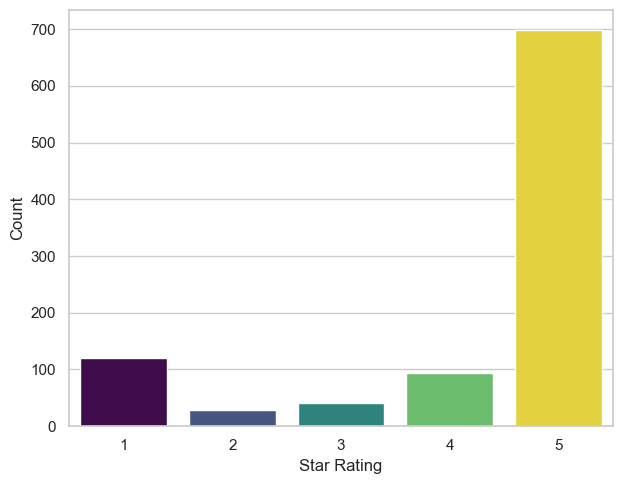

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', hue='rating', data=df, palette='viridis', legend=False)
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Visualizations Reviews per Bank

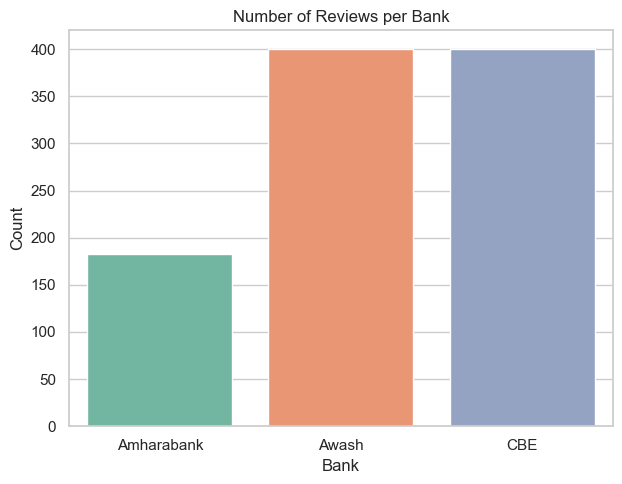

In [34]:
# Reviews per Bank
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', hue='bank_code', data=df, palette='Set2', legend=False)
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
## Distribution of Review Lengths by Bank 

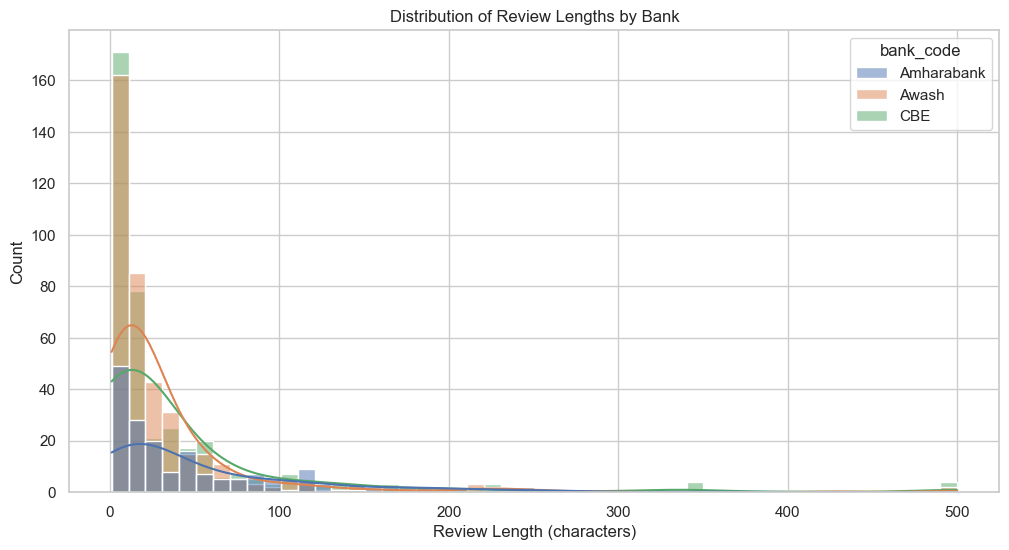

In [35]:
# Review Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()